### 构建环境
- 在cmd中确认python版本为3.12
- 然后执行 pip install opencv-python
- 最后执行 pip install jupyter
- 然后在你想要做笔记的路径下执行cmd 后 执行jupyter notebook就可以了
- 大型环境的IDE推荐pycharm或者vs code

### 图像基本操作
* 图像有灰度图，一般只有一个通道，0-255从黑到白，也可以理解成从暗到亮
* 但是如果是RGB图那就有三个通道，分别是红绿蓝，也是分别范围是0-255
* RGB 矩阵的大小和图像的大小一样，若图像的像素点宽 500 长 500，则得到 [500,500,3] 的矩阵，这里的 3 就是 3 通道。
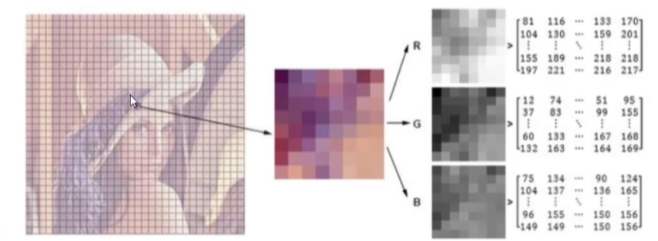


### 数据读取中图像的代码表示
1. cv2.IMREAD_COLOR: 彩色图像颜色读取
2. cv2.IMREAD_GRAYSCALE: 灰度图像读取

In [1]:
import cv2 #导入opencv库 , 默认读取格式是BGR而不是RGB
import matplotlib.pyplot as plt # 用于可视化的绘图库
import numpy as np # 用于科学计算的基础包
#jupyter笔记本里面的一个魔法函数,用于内嵌显示绘图
%matplotlib inline

img = cv2.imread('01_Picture/01_cat.jpg') # 用opencv读取图像

In [2]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [3]:
# 显示图像，也可以创建多个窗口, 第一个参数是窗口名,第二个参数是显示图像的变量名
cv2.imshow('image',img)
# 等待时间,毫秒级, 0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

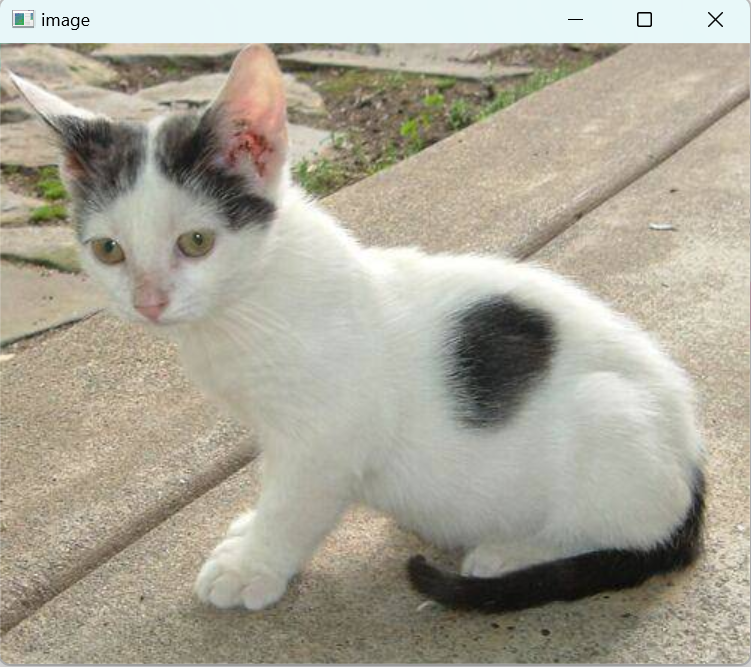

In [4]:
# 定义了一个函数来执行上述操作,方便快捷
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape # (h,w,c) 表示几行几列多高 BGR图

(414, 500, 3)

In [6]:
img=cv2.imread('01_Picture/01_cat.jpg',cv2.IMREAD_GRAYSCALE)
img #生成两维的灰度图数据 范围是0-255 表示灰度值

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [7]:
img.shape

(414, 500)

In [8]:
cv_show('image',img)

显示如下：
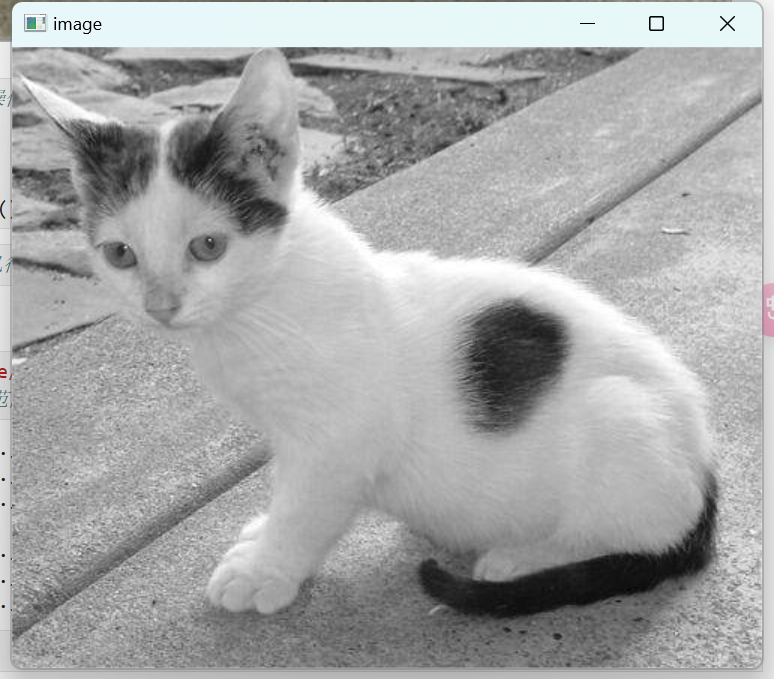

In [9]:
# 保存
cv2.imwrite('01_Picture/mycat.png,img',img)

True

In [10]:
type(img) # ndarray格式

numpy.ndarray

In [11]:
img.size #显示像素点个数

207000

In [12]:
img.dtype # 显示范围type

dtype('uint8')

In [13]:
vc = cv2.VideoCapture('02_Video/00_Scenery.mp4')
if vc.isOpened():   # 检查是否打开正确
    open, frame = vc.read() # 这里的 vc.read() 相当于读取图像的第一帧
                            # 若循环不断的执行 vc.read，则不断的读取第二帧、第三帧....
    print(open) # 正常打开时，open会返回 True
    cv_show('image_scenery',frame)
else:
    open = False

True


In [14]:
while open: # 如果正常打开，则不停循环读取,这里可替换成 i 值，来确定读取 i 帧     
    ret, frame = vc.read()
    if frame is None: # 视频读完以后的下一帧为空
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 读取的图片转换成黑白的   
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF == 27: # cv2.waitKey(10)为等多少时间执行下一帧，0xFF为退出键ESC
            break
vc.release() # release()完成与 open() 相反的工作.释放 open() 向内核申请的所有资源
cv2.destroyAllWindows() # 销毁所有窗口

### “Region of Interest”（ROI，感兴趣区域）在图像处理和计算机视觉领域中是指图像中选择的一部分区域，这部分区域通常是你希望进一步处理或分析的重点。例如，在一张包含许多对象的图像中，你可能只对其中一个对象感兴趣，ROI就是包含该对象的图像部分。


In [15]:
img = cv2.imread('01_Picture/01_cat.jpg')
cat = img[0:200,0:200] # 选择图片感兴趣的区域 ROI 截取部分图像数据
cv_show('cat',cat)

In [16]:
b,g,r = cv2.split(img) # 颜色通道提取

In [17]:
b

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       ...,
       [162, 157, 142, ..., 181, 170, 149],
       [140, 147, 139, ..., 169, 125, 106],
       [154, 154, 121, ..., 183, 128, 127]], dtype=uint8)

In [19]:
b.shape # BGR三个的大小都一样

(414, 500)

In [23]:
img = cv2.merge((b,g,r)) # 将bgr重新组合起来成一张图片
img.shape

(414, 500, 3)

In [27]:
img = cv2.imread('01_Picture/01_cat.jpg')
b,g,r = cv2.split(img)
cv_show('cat_b',b)
print('b.shape:',b.shape) # B通道，单通道，灰度图
cv_show('cat_g',g)
print('g.shape:',g.shape) # G通道，单通道，灰度图
cv_show('cat_r',r)
print('r.shape:',r.shape) # R通道，单通道，灰度图
img = cv2.merge((b,g,r))
print('img.shape:',img.shape) # 3 通道，彩色图
cv_show('cat_img',img)

b.shape: (414, 500)
g.shape: (414, 500)
r.shape: (414, 500)
img.shape: (414, 500, 3)


In [28]:
# 只保留 R
img = cv2.imread('01_Picture/01_cat.jpg')
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))
cur_img = img.copy()
cur_img[:,:,0] = 0 
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [29]:
# 只保留 G
img = cv2.imread('01_Picture/01_cat.jpg')
cur_img = img.copy()
cur_img[:,:,0] = 0 
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [30]:
# 只保留 R
img = cv2.imread('01_Picture/01_cat.jpg')
cur_img = img.copy()
cur_img[:,:,1] = 0 
cur_img[:,:,2] = 0
cv_show('B',cur_img)